**OpenCV Basics**

In [2]:
import os
print('Directory is: ', os.getcwd())
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\johna\Downloads\research\toast.jpg"
print('Path is: ', path)
img = cv.imread(path)
print('Shape of img is: ', img.shape)

Directory is:  c:\Users\johna\Downloads\research
Path is:  C:\Users\johna\Downloads\research\toast.jpg
Shape of img is:  (4000, 3000, 3)


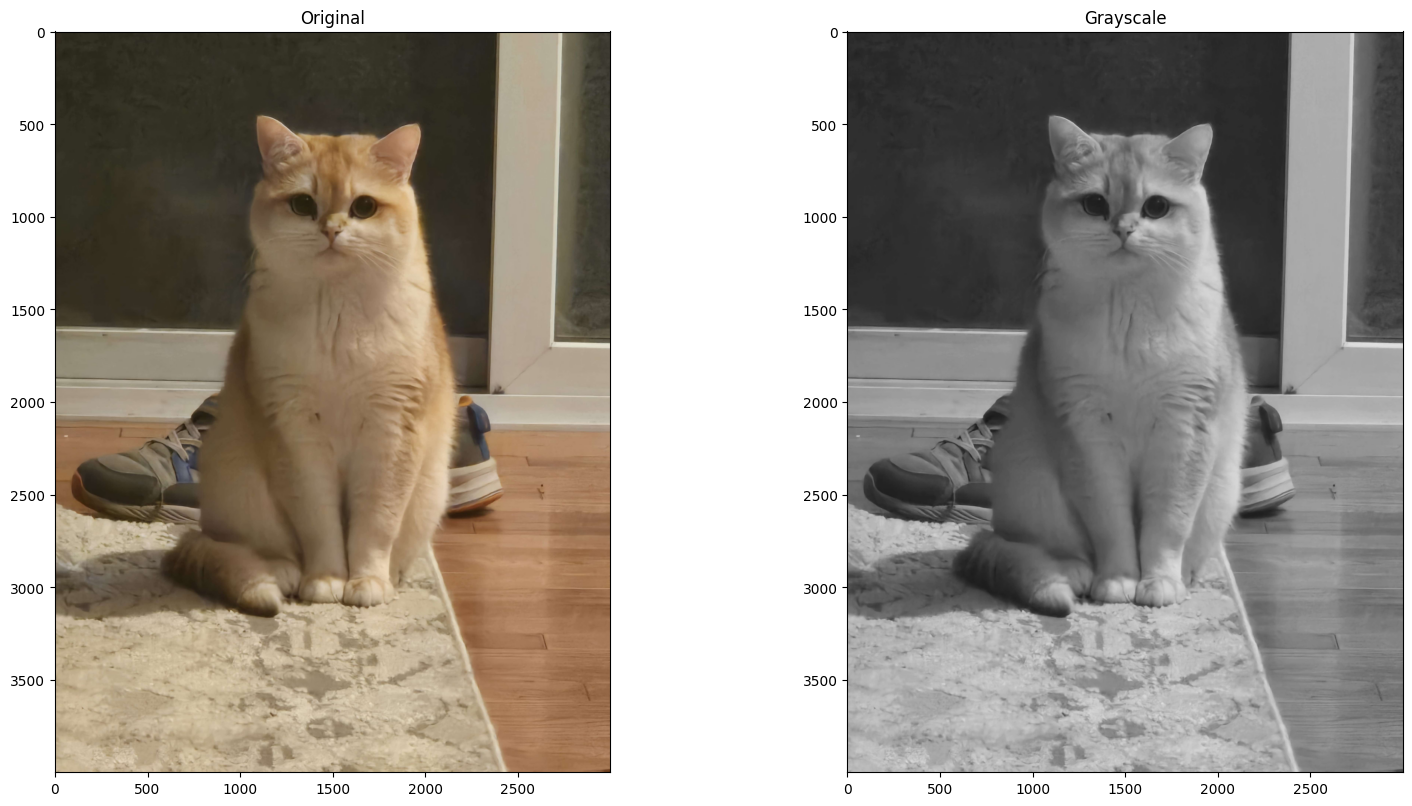

In [3]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()

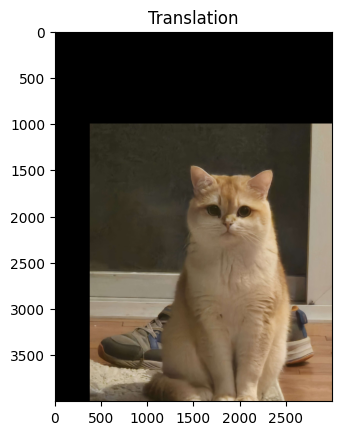

In [4]:
h, w = img.shape[:2]

half_height, half_width = h//4, w//8
transition_matrix = np.float32([[1, 0, half_width],
                               [0, 1, half_height]])

img_transition = cv.warpAffine(img, transition_matrix, (w, h))

plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()

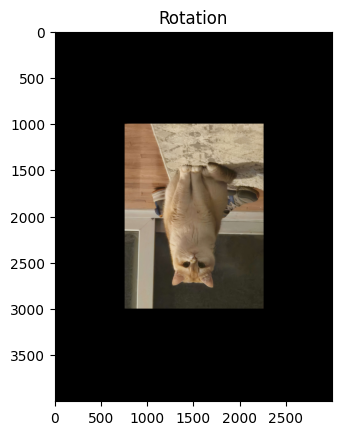

In [5]:
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -180, 0.5)

rotated_image = cv.warpAffine(img, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

Text(0.5, 1.0, 'Skewed Interpolation Scale')

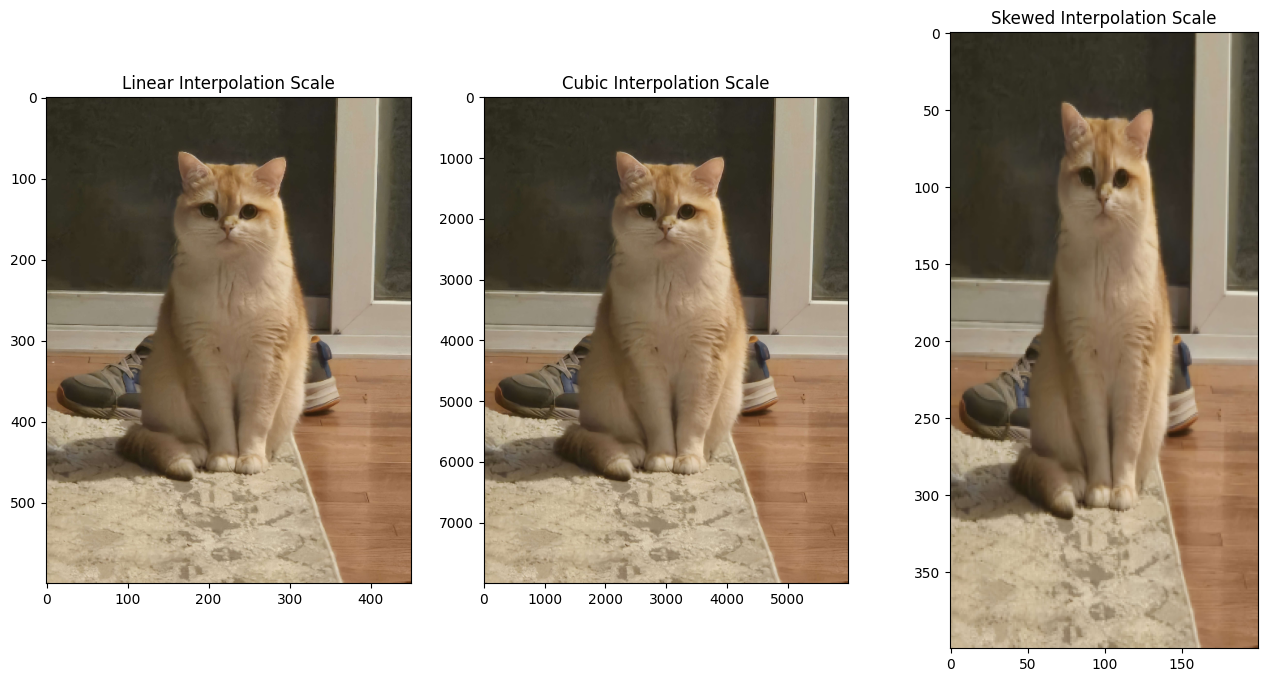

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# image size being 0.15 times of its original size
image_scaled = cv.resize(img, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

# image size being 2 times of its original size
image_scaled_2 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

# image size being 0.15 times of its original size
image_scaled_3 = cv.resize(img, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")

(8000, 6000, 3)


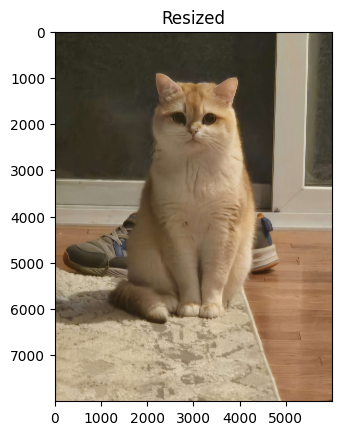

In [7]:
fig.tight_layout()
img2 = cv.resize(img, (w*2, h*2))
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Resized")
print(img2.shape)

In [8]:
print('Processed Image Shapes:')

from tabulate import tabulate
head = ["Image Type", "Shape"]
images = [["Default", img.shape],
          ["Grayscale", gray_image.shape],
          ["Translated", img_transition.shape],
          ["Rotated", rotated_image.shape],
          ["Linear Interpolation", image_scaled.shape],
          ["Cubic Interpolation", image_scaled_2.shape],
          ["Skewed Interpolation", image_scaled_3.shape],
          ["Doubled Size", img2.shape]]
print(tabulate(images, headers=head, tablefmt="grid"))
print("(Width, Height, Color Channels)")

Processed Image Shapes:
+----------------------+-----------------+
| Image Type           | Shape           |
+======================+=================+
| Default              | (4000, 3000, 3) |
+----------------------+-----------------+
| Grayscale            | (4000, 3000)    |
+----------------------+-----------------+
| Translated           | (4000, 3000, 3) |
+----------------------+-----------------+
| Rotated              | (4000, 3000, 3) |
+----------------------+-----------------+
| Linear Interpolation | (600, 450, 3)   |
+----------------------+-----------------+
| Cubic Interpolation  | (8000, 6000, 3) |
+----------------------+-----------------+
| Skewed Interpolation | (400, 200, 3)   |
+----------------------+-----------------+
| Doubled Size         | (8000, 6000, 3) |
+----------------------+-----------------+
(Width, Height, Color Channels)


**Histogram Equalization**

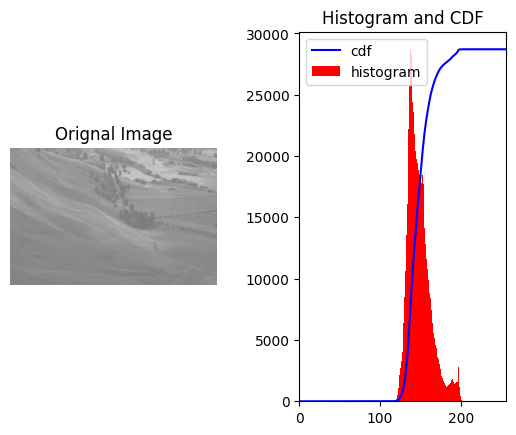

In [9]:


# Implementation in NumPy
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Orignal Image")

plt.subplot(1,2,2) 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram and CDF")
plt.subplots_adjust(wspace=0.4)
plt.show()

# CDF plots pixel intensity value divided by total number of pixels

Image courtesy of https://en.wikipedia.org/wiki/Histogram_equalization

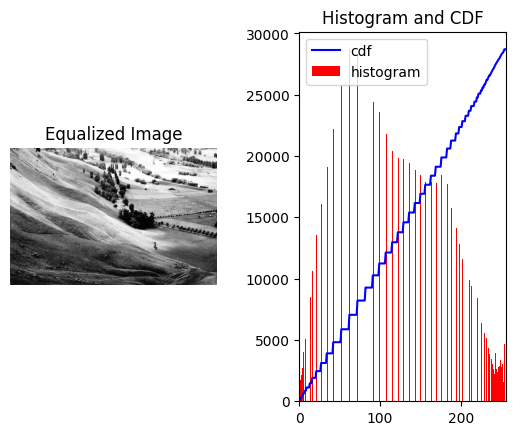

In [10]:
# Applying equalization

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * float(hist2.max()) / cdf2.max()

plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Equalized Image")

plt.subplot(1,2,2) 
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram and CDF")
plt.subplots_adjust(wspace=0.4)
plt.show()

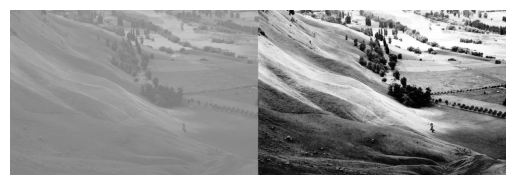

In [11]:
# Implementation in OpenCV

img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
# cv.imwrite('res.png',res) to save onto device
plt.axis("off")
plt.imshow(res, cmap='gray', vmin=0, vmax=255)

# Note that histogram equalization will not always improve image quality!

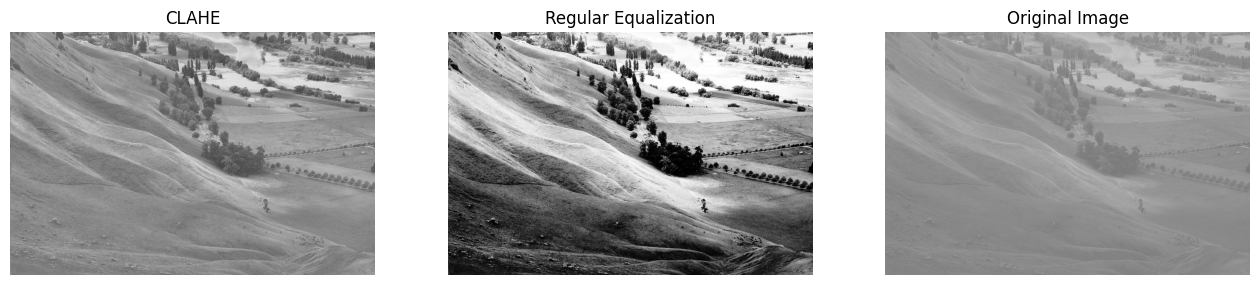

In [12]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
# Used to prevent over-brightening images when equalizing

import numpy as np
import cv2 as cv
 
img = cv.imread('wiki.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
 
# cv.imwrite('wiki_2.jpg',cl1) to save onto machine

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
plt.subplot(1,3,1)
plt.axis("off")
plt.title("CLAHE")
plt.imshow(cl1,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Regular Equalization")
plt.imshow(equ, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

**Segmentation using histograms**

Text(0.5, 1.0, 'Target')

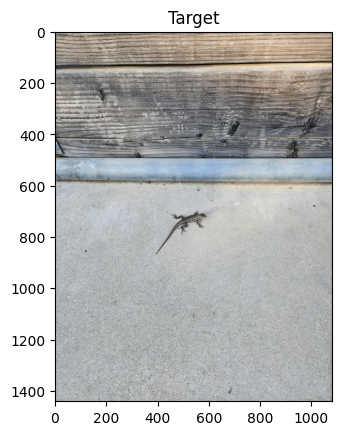

In [91]:
# ---Segmentation---
# Backprojection algorithm

# NumPy Implementation

# Calculate color histogram 
 
# target is the image we search in
target = cv.imread('lizard.jpg')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
plt.imshow(cv.cvtColor(target, cv.COLOR_BGR2RGB))
plt.title("Target")


Text(0.5, 1.0, 'RoI')

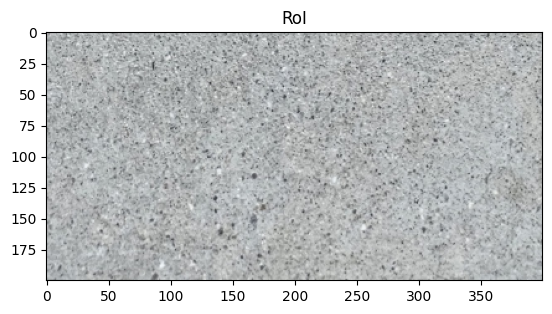

In [93]:
# roi is the object or region of object we need to find
roi = target[1200:1400, 200:600]
# assert roi is not None, "file could not be read, check with os.path.exists()" --> use if reading file instead
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))
plt.title("RoI")
 

In [94]:
# Find the histograms using calcHist. Can be done with np.histogram2d also
M = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] ) # histogram of object
I = cv.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] ) # histogram of image
R = M/I # ratio
print(M)
print(I)

[[119.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[2.2879e+04 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.3800e+02]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 9.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


C:\Users\johna\AppData\Local\Temp\ipykernel_43596\2795512032.py:4: RuntimeWarning: invalid value encountered in divide
  R = M/I # ratio


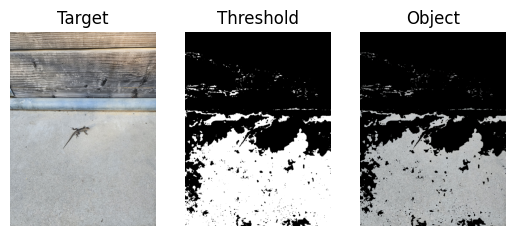

In [95]:
# Backprojection
h,s,v = cv.split(hsvt)
B = R[h.ravel(),s.ravel()]
B = np.minimum(B,1)
B = B.reshape(hsvt.shape[:2])

# Apply convolution with circular disk
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv.normalize(B,B,0,255,cv.NORM_MINMAX)

# Thresholding             
ret,thresh = cv.threshold(B,50,255,0)

# Extract the object using the binary mask
mask = thresh.astype(bool)
extr = np.zeros_like(target)
extr[mask] = target[mask]

plt.subplot(1,3,1)
plt.axis("off")
plt.title("Target")
plt.imshow(cv.cvtColor(target, cv.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.axis("off")
plt.title("Threshold")
plt.imshow(thresh, cmap='gray')

plt.subplot(1,3,3)
plt.axis("off")
plt.title("Object")
plt.imshow(cv.cvtColor(extr, cv.COLOR_BGR2RGB))

(-0.5, 3242.5, 1440.5, -0.5)

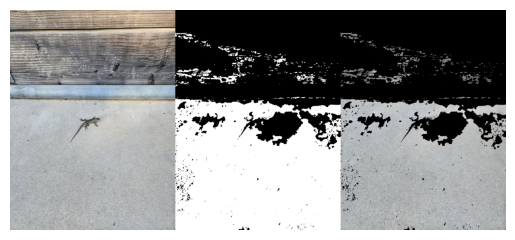

In [98]:
# Implementation in OpenCV

import numpy as np
import cv2 as cv

target = cv.imread('lizard.jpg')
assert target is not None, "file could not be read, check with os.path.exists()"
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)

roi = target[1200:1400, 200:600]
# assert roi is not None, "file could not be read, check with os.path.exists()" --> use if reading file instead
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
  
# calculating object histogram
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
 
# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
 
# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
 
# threshold and binary AND
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)
 
res = np.hstack((target,thresh,res))
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.axis("off")

https://docs.opencv.org/4.x/dc/df6/tutorial_py_histogram_backprojection.html

**Segmentation using brightness and contrast adjustment**

Text(0.5, 1.0, 'HSV Mapping')

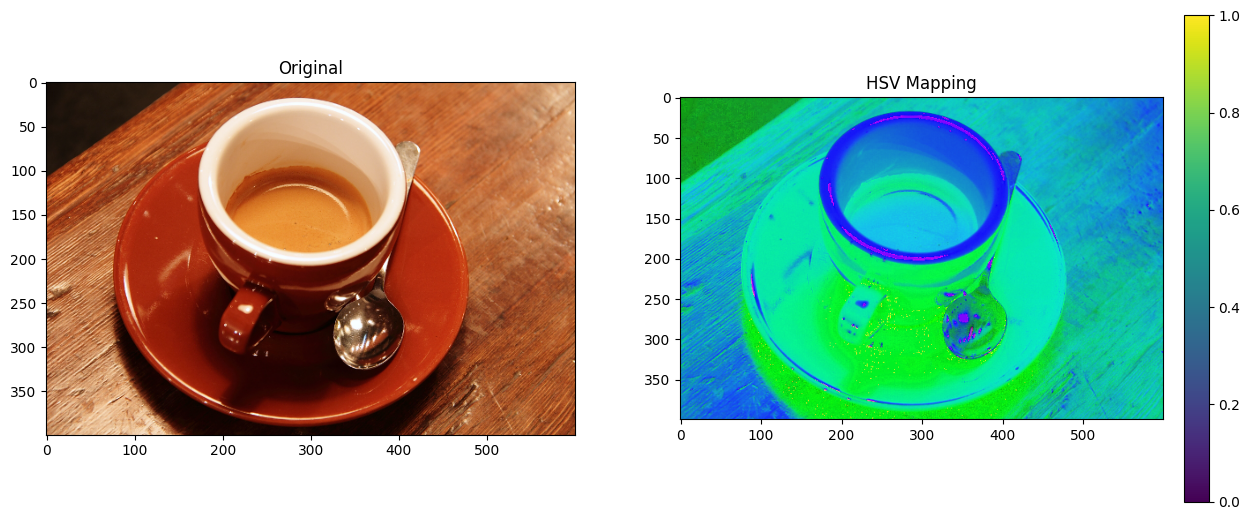

In [3]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)
plt.title("Original")

# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
plt.subplot(1, 2, 2)
# HSV = Hue, Saturation, Value: describes proportions of red, green, and blue

# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)

# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04)
plt.title("HSV Mapping")

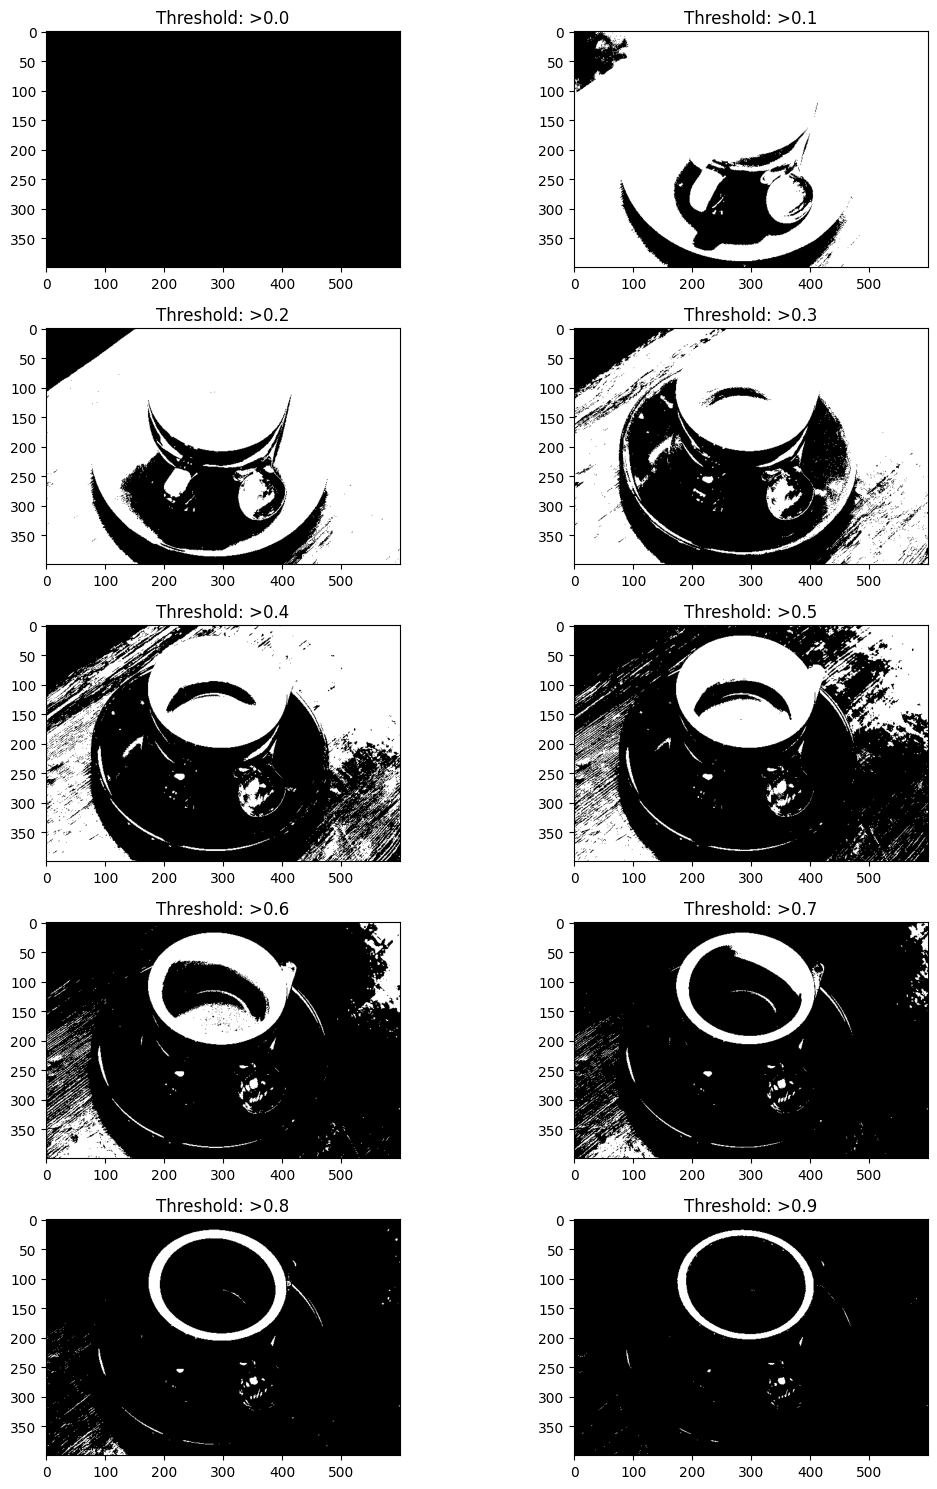

In [5]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Thresholding
for i in range(10):

    # Iterating different thresholds
    binarized_gray = (gray_coffee > i*0.1)*1
    plt.subplot(5,2,i+1)

    # Rounding of the threshold
    # value to 1 decimal point
    plt.title("Threshold: >"+str(round(i*0.1,1)))

    # Displaying the binarized image
    # of various thresholds
    plt.imshow(binarized_gray, cmap = 'gray')

    plt.tight_layout()


https://www.geeksforgeeks.org/image-segmentation-using-pythons-scikit-image-module/


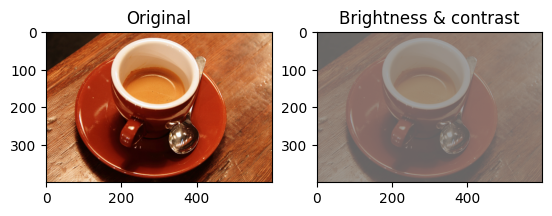

In [17]:
#Import the necessary libraries 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

# Load the image 
image = data.coffee()

#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image) 

# Adjust the brightness and contrast 
# Adjusts the brightness by adding 10 to each pixel value 
brightness = 10*10
# Adjusts the contrast by scaling the pixel values by 2.3 
contrast = 2.3/10
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness) 

#Plot the contrast image 
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(image2) 
plt.show()


ValueError: num must be an integer with 1 <= num <= 10, not 11

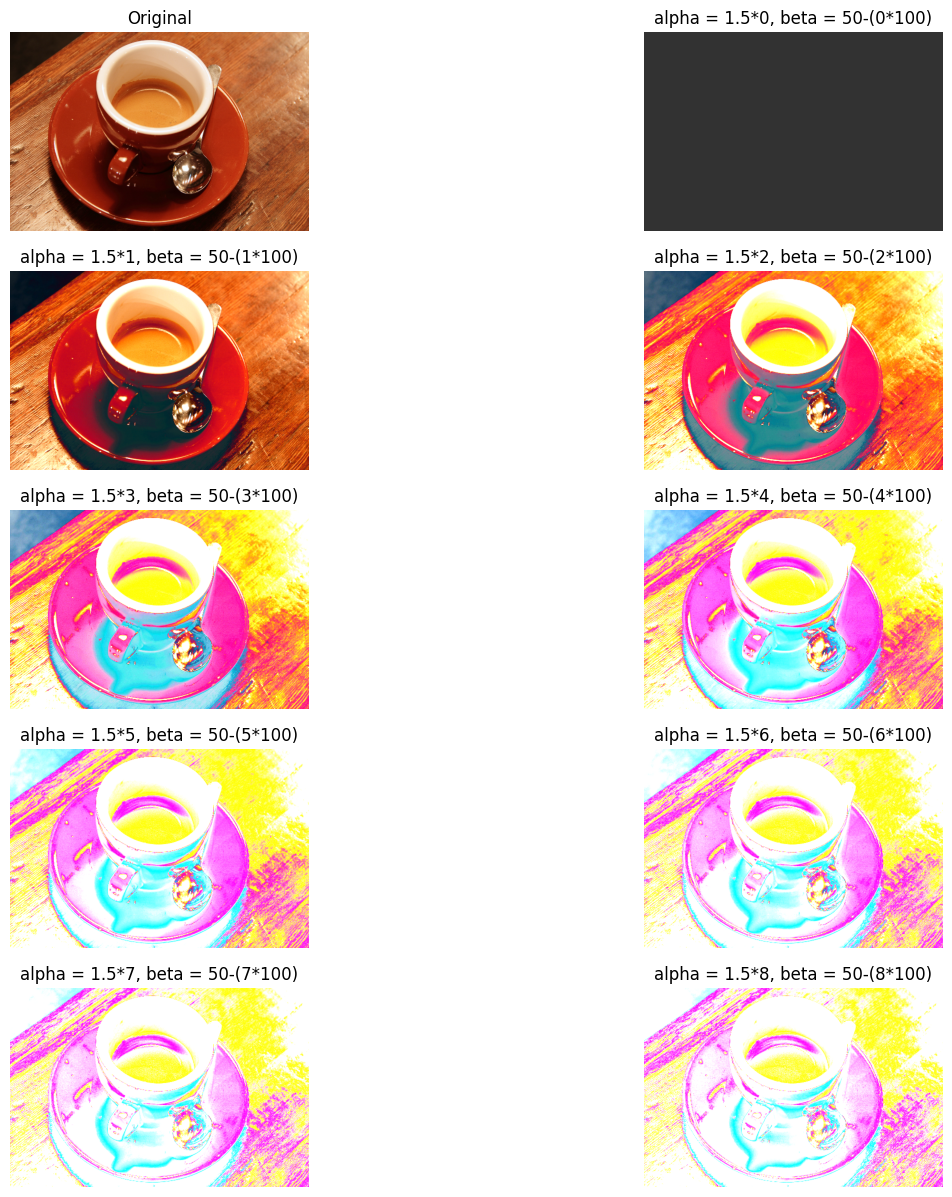

In [40]:
# Alternative method
# Import the necessary libraries 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage import data

# Load the image 
image = data.coffee()

# Plot the original image 
plt.figure(figsize=(15, 15))
plt.subplot(5, 2, 1) 
plt.title("Original") 
plt.imshow(image)
plt.axis("off") 

for i in range(10):
    # Adjust the brightness and contrast 
    # g(i,j)=α⋅f(i,j)+β 
    # control Contrast by 1.5 
    alpha = 1.5 * i
    # control brightness by 50 
    beta = 50 - (i * 100)
    image2 = cv2.convertScaleAbs(image, alpha=alpha, beta=beta) 

    # Plot the contrast image 
    plt.subplot(5, 2, i+2)  # Start from the second subplot
    plt.title(f"alpha = 1.5*{i}, beta = 50-({i}*100)") 
    plt.imshow(image2) 
    plt.axis("off")

plt.show()
